In [1]:
# import libary
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as crs

In [2]:
# get data url
url = 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v5/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc'

# open the .nc file with xarray
xrds = xr.open_dataset(url)
print(xrds)

<xarray.Dataset>
Dimensions:  (time: 1716, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2022-12-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (time, z, lat, lon) float32 ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
  

In [3]:
# access all the attributes information in the .nc file
for attribute,value in xrds.attrs.items():
    print(attribute,value)

Conventions CF-1.6, ACDD-1.3
title NOAA Merged Land Ocean Global Surface Temperature Analysis (NOAAGlobalTemp)
summary NOAAGlobalTemp is a merged land-ocean surface temperature analysis, formerly abbreviated as MLOST. The SST dataset is the Extended Reconstructed Sea Surface Temperature (ERSST) and the land surface air temperature dataset is from the Global Historical Climatology Network Monthly (GHCN-M) database.
institution DOC/NOAA/NESDIS/National Centers for Environmental Information(NCEI)
id  gov.noaa.ncdc:C00934 
naming_authority  gov.noaa.ncei 
project  NOAAGlobalTemp 
platform Ships, moored buoys, surface drifting buoys, Argo floats, and weather stations
instrument Conventional thermometers
history Version 5.0.0, blending ERSST V5 and GHCN-M V4.
comment Merged land ocean surface temperature anomalies.
product_version 5.0.0
source NOAAGlobalTemp combines a global sea surface temperature with a global land surface air temperature data
ncei_template_version NCEI_NetCDF_Grid_Templa

In [4]:
# acess the information in the "anon" variable
for attribute,value in xrds['anom'].attrs.items():
    print(attribute,value)

long_name Global Temperature Anomalies
standard_name surface_temperature_anomaly
coverage_content_type physicalMeasurement
units degrees C
valid_min -40.0
valid_max 40.0


In [6]:
# convert the xrds to dataframe
df = xrds.to_dataframe()
df.head()

anom
time       lat   lon  z        
1880-01-01 -87.5 2.5  0.0   NaN
                 7.5  0.0   NaN
                 12.5 0.0   NaN
                 17.5 0.0   NaN
                 22.5 0.0   NaN

In [7]:
#3 access the time the data covers
xrds['time'].values

array(['1880-01-01T00:00:00.000000000', '1880-02-01T00:00:00.000000000',
       '1880-03-01T00:00:00.000000000', ...,
       '2022-10-01T00:00:00.000000000', '2022-11-01T00:00:00.000000000',
       '2022-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [16]:
# since we see how the date format is , let access data for a date wihtin the range
desired_date = '1999-08-01'
data_for_desired_date = xrds.sel(time=desired_date,method='nearest')
print(data_for_desired_date)

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, z: 1)
Coordinates:
    time     datetime64[ns] 1999-08-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (z, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatolo

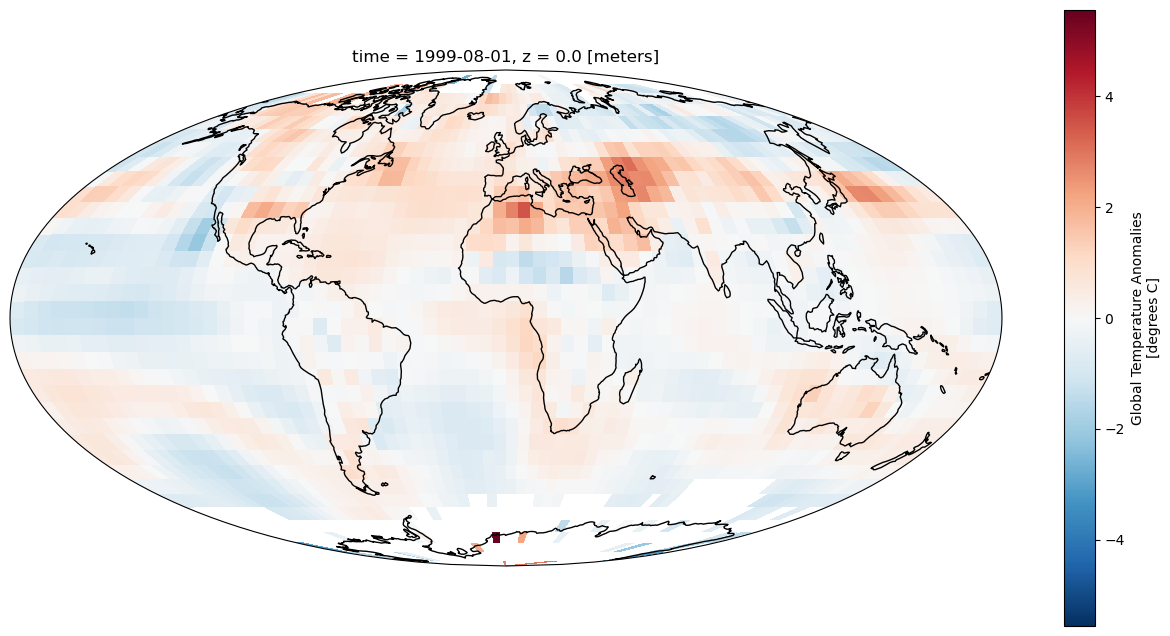

In [17]:
fig = plt.figure(figsize=(16,8))
transform = crs.PlateCarree()
# check cartopy project to see how many projections we have available
ax = plt.axes(projection=crs.Mollweide())
data_for_desired_date['anom'].plot(ax=ax, transform=transform)
ax.coastlines()
plt.show();

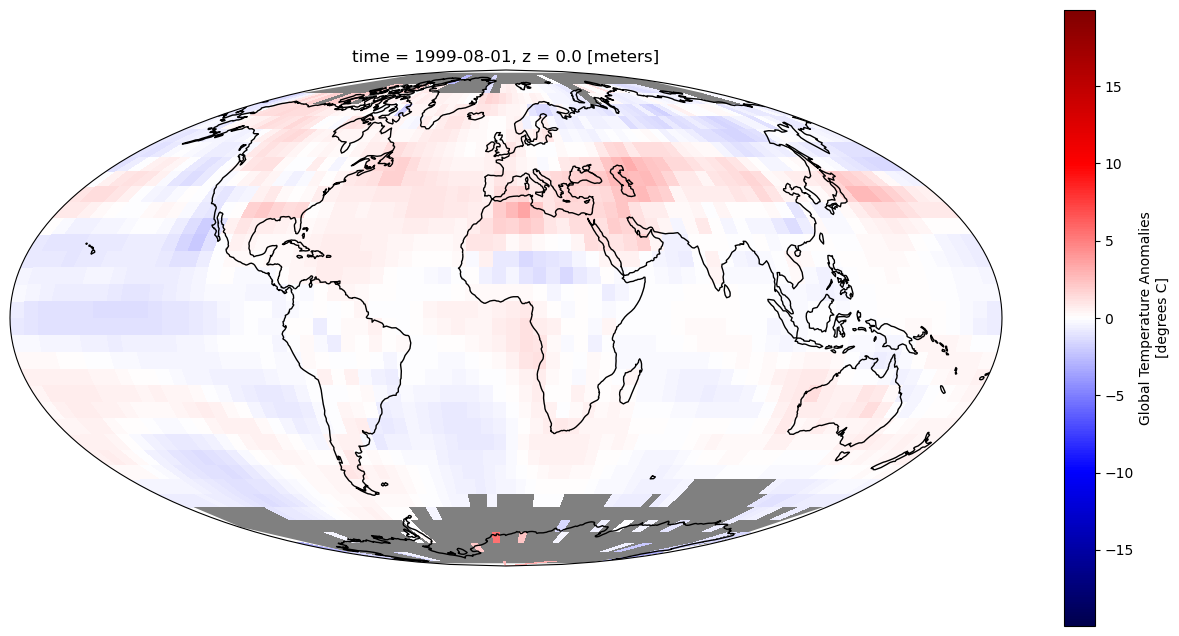

In [26]:
#Assigning grey colour to location wihtout any data at all (No value)
fig = plt.figure(figsize=(16,8))
transform = crs.PlateCarree()
# check cartopy project to see how many projections we have available
ax = plt.axes(projection=crs.Mollweide())

xmin, xmax, ymin, ymax = ax.get_extent(transform)
ax.add_patch(plt.Rectangle((xmin,ymin), 
             xmax-xmin, ymax-ymin, facecolor='grey',
             transform=transform,
             zorder=-1))

min_anom = xrds['anom'].min()
max_anom = xrds['anom'].max()
abs_max = max(abs(min_anom),max_anom)

data_for_desired_date['anom'].plot(ax=ax, transform=transform,vmin=-abs_max, vmax=abs_max,cmap='seismic')
ax.coastlines()
plt.show();

In [24]:
anomalies = xrds['anom']
df = anomalies.to_dataframe()
df.head()

anom
time       z   lat   lon       
1880-01-01 0.0 -87.5 2.5    NaN
                     7.5    NaN
                     12.5   NaN
                     17.5   NaN
                     22.5   NaN


H.-M. Zhang, B. Huang, J. H. Lawrimore, M. J. Menne, and T. M. Smith (2019): NOAA Global Surface Temperature Dataset (NOAAGlobalTemp), Version 5.0. NOAA National Centers for Environmental Information. doi:10.25921/9qth-2p70 [2024-04-13].


https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc%3AC01585

https://www.ncei.noaa.gov/thredds/catalog/noaa-global-temp-v5/latest.html?dataset=noaa-global-temp-v5/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc

https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v5/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc.html

https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C01704/html

